# 모델 학습

In [1]:
import numpy as np
import os
from glob import glob
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

data_path = 'A_linear_5%'
# 0으로 시작하는 폴더만 골라 정렬한 뒤
all_folders = sorted(glob(os.path.join(data_path, '0*')))

# selected_folders = all_folders[:8]
# selected_folders = all_folders[:6] + all_folders[8:10]
# selected_folders = all_folders[:4] + all_folders[6:10]
# selected_folders = all_folders[:2] + all_folders[4:10]
selected_folders = all_folders[2:10]

# val_folders = all_folders[8:]
# val_folders = all_folders[6:8]
# val_folders = all_folders[4:6]
# val_folders = all_folders[2:4]
val_folders = all_folders[0:2]


data_list = []
for folder in selected_folders:
    folder_name = os.path.basename(folder)
    print('Processing folder:', folder_name)
    file_list = glob(os.path.join(folder, '*.npy'))
    for file_path in file_list:
        tmp_data = np.load(file_path, allow_pickle=True)
        data_list.append(tmp_data)

# concat
X_train = np.concatenate(data_list, axis=0)
print('X_train shape:', X_train.shape)


Processing folder: 00370960(0002)_1
Processing folder: 00370960(0002)_2
Processing folder: 00391262(0002)
Processing folder: 00451902(0002)
Processing folder: 00454547(0002)_1
Processing folder: 00454547(0002)_2
Processing folder: 00465382(0002)
Processing folder: 00466746(0002)
X_train shape: (1152214, 1440)


In [2]:
import os
import pickle
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_train_raw = X_train
V_mean = np.mean(X_train_raw)
V_std = np.std(X_train_raw)
print('V_mean:', V_mean)
print('V_std:', V_std)

V_mean: 3.5562382
V_std: 0.25772804


In [3]:
# 표준화(standardization)
X_train = (X_train_raw - V_mean) / V_std

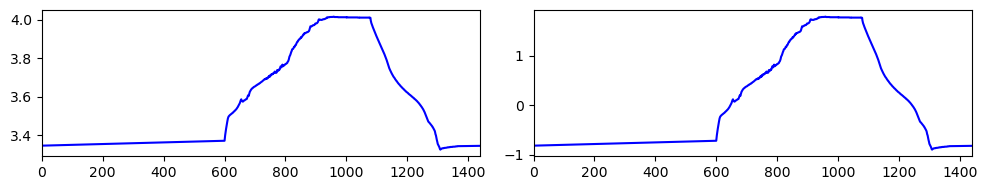

In [4]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(X_train_raw[0,:],'b'); plt.xlim([0,1440])
plt.subplot(1,2,2)
plt.plot(X_train[0,:],'b'); plt.xlim([0,1440])

plt.tight_layout()

(0.0, 10.0, 0.0, 1.0)

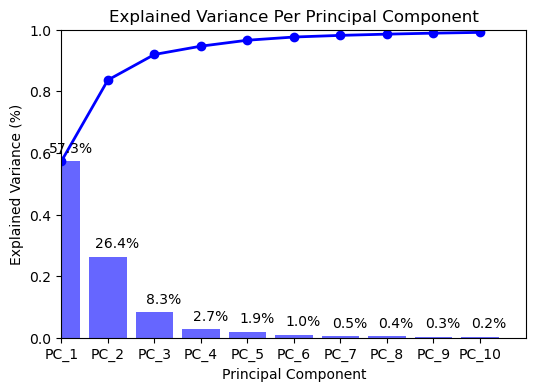

In [6]:
pca = PCA(n_components=10, random_state=SEED)
pca.fit(X_train)
num_components = len(pca.explained_variance_ratio_)
vals = pca.explained_variance_ratio_

ind = np.arange(num_components)
cumvals = np.cumsum(vals)

plt.figure(figsize=(6, 4))
plt.bar(ind, vals, label='Explained Variance', color='b', alpha=0.6)
plt.plot(ind, cumvals, label='Cumulative Variance', color='b', marker='o', linestyle='-', linewidth=2)

for i in range(10):
    plt.annotate(f"{vals[i] * 100:.1f}%", (ind[i] + 0.2, vals[i] + 0.02),
                 va="bottom", ha="center", fontsize=10)

plt.xticks(ind, [f"PC_{i+1}" for i in ind])
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title('Explained Variance Per Principal Component')
plt.axis([0, 10, 0, 1])


In [7]:
num_components = [4]

for component in num_components:
    ## PCA
    pca=PCA(n_components=component, random_state=SEED)
    X_pca=pca.fit_transform(X_train) # compressor

    X_reconstructed=pca.inverse_transform(X_pca) # restoration
    ERROR=np.abs(X_train - X_reconstructed).mean() # reconstruction error

    print('----------PCA model training----------')
    print('Principal Component:', component)
    print('Variance Explained(%):', np.round(sum(pca.explained_variance_ratio_)*100,2))
    print('Train Reconstruction Error(%):', str(np.round(ERROR*100,2)))
    print('--------------------------------------\n')

    # model_PATH = '.\\model'
    # os.makedirs(model_PATH,exist_ok=True)
    # with open(model_PATH+'\\pca_model_c'+str(component)+'.pkl', 'wb') as f:
    #     pickle.dump(pca, f)
    model_PATH = './정상 PCA model'
    os.makedirs(model_PATH, exist_ok=True)
    with open(os.path.join(model_PATH, f"pca_model_c{component}.pkl"), 'wb') as f:
        pickle.dump(pca, f)
        

----------PCA model training----------
Principal Component: 4
Variance Explained(%): 94.66
Train Reconstruction Error(%): 5.01
--------------------------------------



In [8]:
print('X_train shape:',X_train.shape)
print('X_pca shape:',X_pca.shape)
print('X_reconstructed shape:',X_reconstructed.shape)

X_train shape: (1152214, 1440)
X_pca shape: (1152214, 4)
X_reconstructed shape: (1152214, 1440)


Principal Component: 4
Variance Explained(%): 94.66


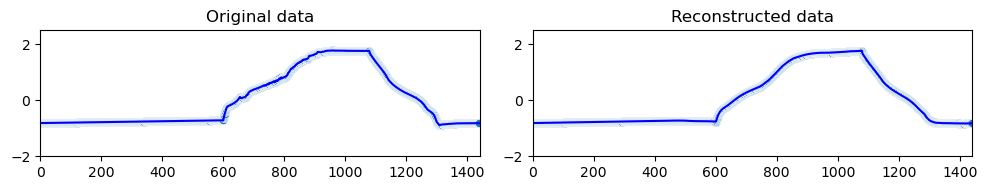

In [9]:
idx = 0

print('Principal Component:', component)
print('Variance Explained(%):', np.round(sum(pca.explained_variance_ratio_)*100,2))

plt.figure(figsize=(10,2))
plt.subplot(1,2,1); plt.title('Original data')
sns.scatterplot(X_train[idx,:]); sns.lineplot(X_train[idx,:],color='b')
plt.xlim([0,1440]); plt.ylim([-2,2.5])
plt.subplot(1,2,2); plt.title('Reconstructed data')
sns.scatterplot(X_reconstructed[idx,:]); sns.lineplot(X_reconstructed[idx,:],color='b')
plt.xlim([0,1440]); plt.ylim([-2,2.5])

plt.tight_layout()

# 벨리데이션 정상 데이터

In [10]:
import numpy as np
import os
import pickle
from glob import glob

# 1. 학습 때 쓰던 평균·표준편차와 PCA 모델 로드
model_dir = './정상 PCA model'
with open(os.path.join(model_dir, 'pca_model_c4.pkl'), 'rb') as f:
    pca = pickle.load(f)

In [11]:
import numpy as np
import os
import pickle
from glob import glob

# (2) 검증용: 폴더 2개 사용

# val_folders = all_folders[8:]
# val_folders = all_folders[6:8]
# val_folders = all_folders[4:6]
# val_folders = all_folders[2:4]

# ——— 벨리데이션 데이터 로드 & 결합 ———
val_list = []
for folder in val_folders:
    for fp in glob(os.path.join(folder, '*.npy')):
        val_list.append(np.load(fp, allow_pickle=True))
X_val_raw = np.concatenate(val_list, axis=0)
print(X_val_raw.shape)

(165130, 1440)


In [12]:
# ——— 표준화 ———
X_val = (X_val_raw - V_mean) / V_std
# ——— PCA 투영 
X_val_pca   = pca.transform(X_val)
# 재구성 ———
X_val_recon = pca.inverse_transform(X_val_pca)
# ——— MAE 계산 & 임계치 설정 ———
mae_per_sample = np.mean(np.abs(X_val - X_val_recon), axis=1)

print(f"MAE min: {mae_per_sample.min():.6f}")
print(f"MAE max: {mae_per_sample.max():.6f}")
# threshold_95 = np.percentile(mae_per_sample, 90)
# print(f"90% percentile threshold: {threshold_95:.6f}")

MAE min: 0.034503
MAE max: 0.122885


In [13]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))

# # 히스토그램 그리기 (투명도 α=0.7)
# n, bins, patches = plt.hist(mae_per_sample, bins=50, alpha=0.7)

# # 90% 임계치 표시 (투명도 α=0.8)
# plt.axvline(threshold_95, linestyle='--', linewidth=2, alpha=0.9, color = 'r')
# plt.text(threshold_95, n.max() * 0.9, '90th percentile', rotation=90,
#          va='top', ha='right')

# # 그리드 추가
# plt.grid(True, linestyle='--', alpha=0.5)

# # 레이블 및 제목
# plt.xlabel('MAE')
# plt.ylabel('Frequency')
# plt.title('MAE Distribution with 90th Percentile Threshold')

# plt.tight_layout()
# plt.show()


# 벨리데이션 비정상 데이터

In [14]:
import numpy as np
import os
import pickle
from glob import glob

# 1. 학습 때 쓰던 평균·표준편차와 PCA 모델 로드
model_dir = './정상 PCA model'
with open(os.path.join(model_dir, 'pca_model_c4.pkl'), 'rb') as f:
    pca = pickle.load(f)

# 2. 비정상 데이터 로드 & 결합
# A_numpy_float 폴더 안의 모든 서브폴더를 정렬한 뒤, 첫 3개를 비정상 데이터 폴더로 사용
all_dirs = sorted([
    d for d in glob(os.path.join('A_linear_5%', '*'))
    if os.path.isdir(d)
])
abn_dirs = all_dirs[-3:]

abn_list = []
for folder in abn_dirs:
    folder_name = os.path.basename(folder)
    print('Processing abnormal folder:', folder_name)
    for fp in glob(os.path.join(folder, '*.npy')):
        abn_list.append(np.load(fp, allow_pickle=True))

X_abn_raw = np.concatenate(abn_list, axis=0)
print('X_abn_raw shape:', X_abn_raw.shape)

# 3. 표준화
X_abn = (X_abn_raw - V_mean) / V_std

# 4. PCA 투영 및 재구성
X_abn_pca   = pca.transform(X_abn)
X_abn_recon = pca.inverse_transform(X_abn_pca)

# 5. MAE 계산
mae_abn = np.mean(np.abs(X_abn - X_abn_recon), axis=1)
print(f"Abnormal MAE min: {mae_abn.min():.6f}")
print(f"Abnormal MAE max: {mae_abn.max():.6f}")

y_val   = np.concatenate([
    np.zeros_like(mae_per_sample, dtype=int),
    np.ones_like( mae_abn,        dtype=int)
])
mae_val = np.concatenate([mae_per_sample, mae_abn])

# (7) 후보 threshold 생성
thresholds = np.linspace(mae_val.min(), mae_val.max(), 200)

# (8) Youden’s J 통계량 최대화
best_j, best_th = -1, None
for th in thresholds:
    y_pred = (mae_val >= th).astype(int)
    tp = np.sum((y_pred==1) & (y_val==1))
    fp = np.sum((y_pred==1) & (y_val==0))
    tn = np.sum((y_pred==0) & (y_val==0))
    fn = np.sum((y_pred==0) & (y_val==1))

    sens = tp / (tp + fn + 1e-12)
    spec = tn / (tn + fp + 1e-12)
    j    = sens + spec - 1

    if j > best_j:
        best_j, best_th = j, th

print(f"Youden’s J max: {best_j:.3f} at threshold = {best_th:.4f}")

# (9) 최종 임계값 설정
THRESHOLD = best_th

# # 6. Recall 계산
# y_pred_abn = (mae_abn > threshold_95).astype(int)
# recall = y_pred_abn.sum() / len(y_pred_abn)
# print(f"Recall at threshold {threshold_95:.6f}: {recall * 100:.2f}%")


Processing abnormal folder: 1.A.M5C10
Processing abnormal folder: 2.A.R7M17C6
Processing abnormal folder: 3.A.R5M7C11
X_abn_raw shape: (466284, 1440)
Abnormal MAE min: 0.022190
Abnormal MAE max: 0.307184
Youden’s J max: 0.312 at threshold = 0.1067


In [15]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))

# # 히스토그램 그리기 (투명도 α=0.7)
# counts, bin_edges, bars = plt.hist(mae_abn, bins=50, alpha=0.7)

# # 95% 임계치 표시 (투명도 α=0.9)
# plt.axvline(threshold_95, linestyle='--', linewidth=2, alpha=0.9, color='r')
# plt.text(threshold_95, counts.max() * 0.9, '90th percentile', rotation=90,
#          va='top', ha='right')

# # 그리드 추가
# plt.grid(True, linestyle='--', alpha=0.5)

# # 레이블 및 제목
# plt.xlabel('MAE')
# plt.ylabel('Frequency')
# plt.title('MAE Distribution with 90th Percentile Threshold')

# plt.tight_layout()
# plt.show()


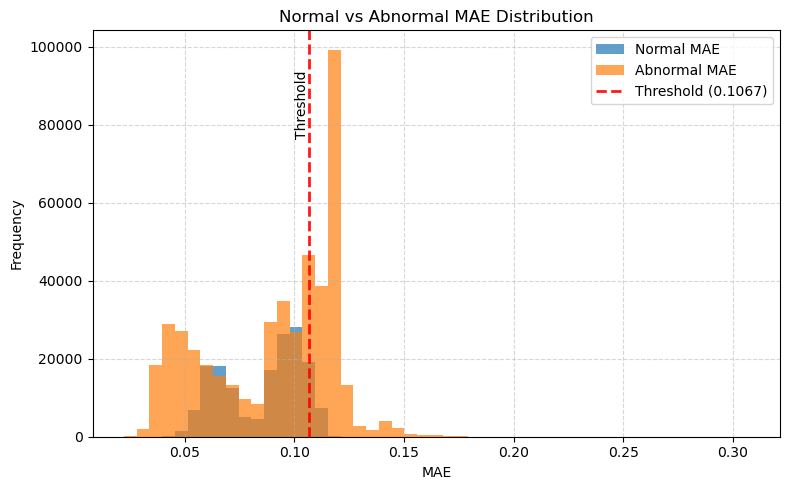

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

# 공통 bins 정의 (normal & abnormal MAE 범위를 모두 아우르도록)
bins = np.linspace(
    min(mae_per_sample.min(), mae_abn.min()),
    max(mae_per_sample.max(), mae_abn.max()),
    50 #그래프 개수를 50개로 설정
)

# 정상 데이터 MAE 히스토그램 (반투명 파란색)
plt.hist(mae_per_sample, bins=bins, alpha=0.7, label='Normal MAE')

# 비정상 데이터 MAE 히스토그램 (반투명 주황색)
plt.hist(mae_abn,      bins=bins, alpha=0.7, label='Abnormal MAE')

# 95th percentile 임계치 표시
plt.axvline(THRESHOLD, linestyle='--', linewidth=2, color='r', 
            alpha=0.9, label=f'Threshold ({THRESHOLD:.4f})')
plt.text(THRESHOLD, plt.ylim()[1] * 0.9, 'Threshold', rotation=90,
         va='top', ha='right')

# 레이블, 제목, 범례, 그리드
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.title('Normal vs Abnormal MAE Distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 테스트 데이터


──────── Test-Set Performance ────────
Threshold : 0.106686
Precision : 0.7933
Recall    : 0.3187
F1-score  : 0.4547
ROC-AUC   : 0.6544
PR-AUC    : 0.7006
───────────────────────────────────────


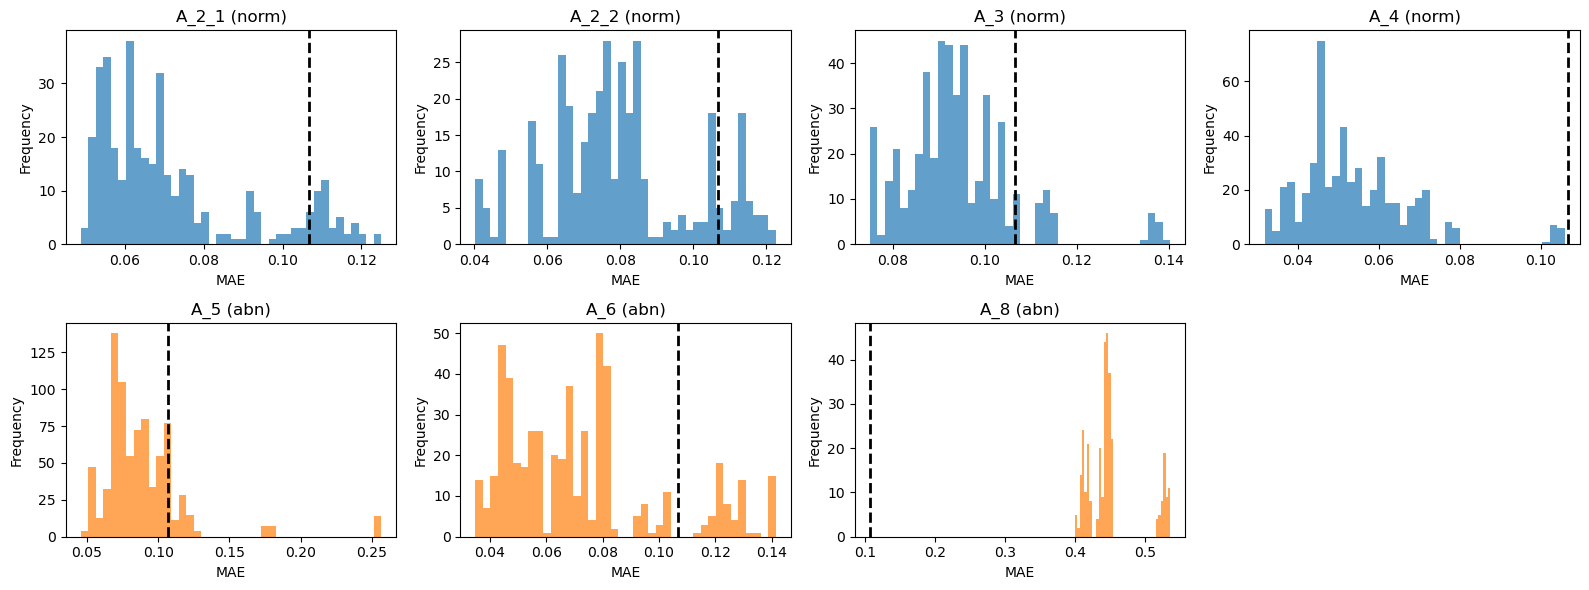

In [19]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)


# ─── 1. 테스트 폴더 정의 ───
ROOT_DIR     = "preprocessing_blind_A"
TEST_FOLDERS = [
    "A_2_1", "A_2_2", "A_3", "A_4",
    "A_5",    # abnormal
    "A_6",    # abnormal
    "A_8"     # abnormal
]
ABNORMAL_SET = {"A_5", "A_6", "A_8"}

# ─── 2. 각 폴더별 MAE 계산 ───
all_mae = []
all_y   = []
mae_by_folder = {}

for folder in TEST_FOLDERS:
    folder_path = os.path.join(ROOT_DIR, folder)
    npy_files   = sorted(glob(os.path.join(folder_path, "*.npy")))

    # 여러 .npy를 합쳐서 (N_samples, N_features) 배열로
    data = [np.load(fp, allow_pickle=True) for fp in npy_files]
    X_raw = np.concatenate(data, axis=0)  

    # 스케일링 → PCA 투영/재구성 → MAE
    X_std = (X_raw - V_mean) / V_std
    X_pca = pca.transform(X_std)
    X_rec = pca.inverse_transform(X_pca)
    mae   = np.mean(np.abs(X_std - X_rec), axis=1)

    # 저장
    all_mae.append(mae)
    label = int(folder in ABNORMAL_SET)
    all_y.append(np.full_like(mae, label, dtype=int))
    mae_by_folder[folder] = mae

# ─── 3. 전체 지표 계산 ───
mae_test = np.concatenate(all_mae)
y_true   = np.concatenate(all_y)
y_pred   = (mae_test > THRESHOLD).astype(int)

print("\n──────── Test-Set Performance ────────")
print(f"Threshold : {THRESHOLD:.6f}")
print(f"Precision : {precision_score(y_true, y_pred):.4f}")
print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_true, y_pred):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_true, mae_test):.4f}")
print(f"PR-AUC    : {average_precision_score(y_true, mae_test):.4f}")
print("───────────────────────────────────────")

# ─── 4. 폴더별 MAE 분포 시각화 ───
n = len(TEST_FOLDERS)
cols = 4
rows = (n + cols - 1) // cols
plt.figure(figsize=(cols * 4, rows * 3))

for idx, folder in enumerate(TEST_FOLDERS, start=1):
    if folder not in mae_by_folder:
        continue
    data = mae_by_folder[folder]

    ax = plt.subplot(rows, cols, idx)

    hist_color = 'C1' if folder in ABNORMAL_SET else 'C0'
    ax.hist(data, bins=40, alpha=0.7, color=hist_color)

    ax.axvline(THRESHOLD, linestyle="--", linewidth=2, color="k")
    ax.set_title(f"{folder} ({'abn' if folder in ABNORMAL_SET else 'norm'})")
    ax.set_xlabel("MAE"); ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()



──────── Test-Set Performance ────────
Threshold : 0.106686
Precision : 0.7933
Recall    : 0.3187
F1-score  : 0.4547
ROC-AUC   : 0.6544
PR-AUC    : 0.7006
───────────────────────────────────────


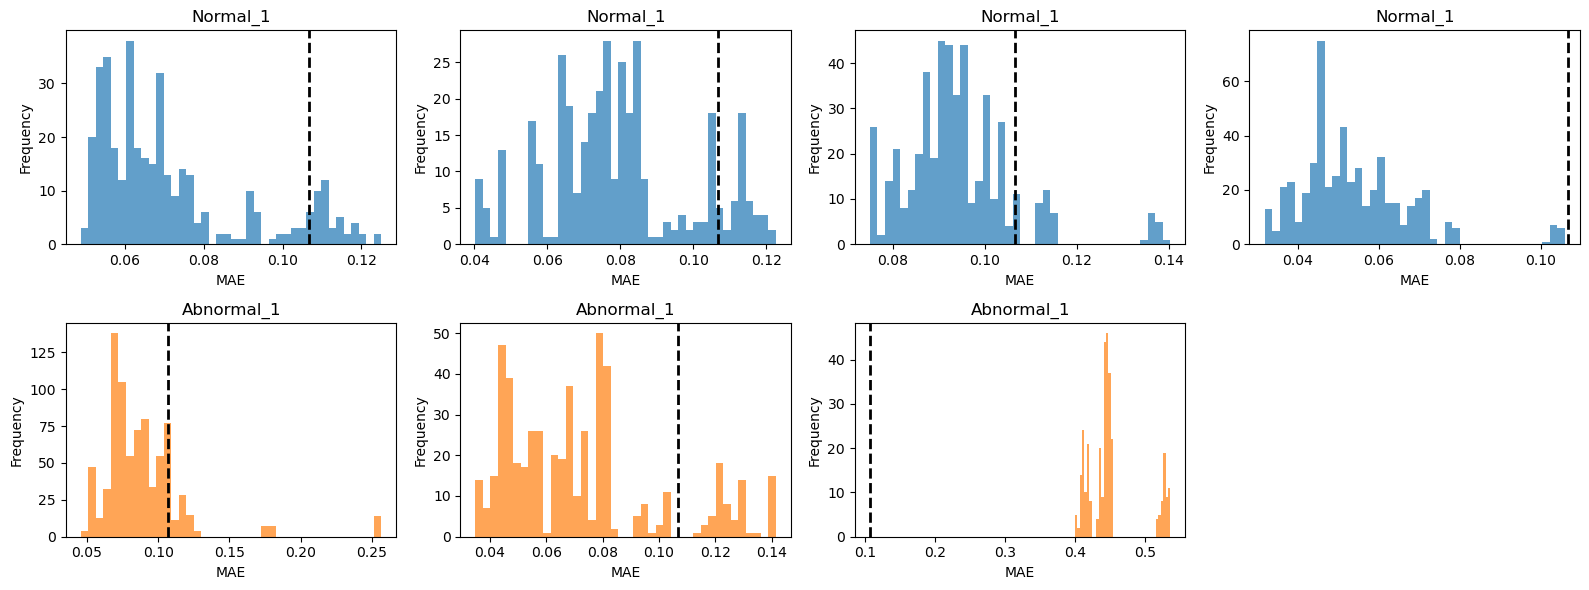

In [21]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)


# ─── 1. 테스트 폴더 정의 ───
ROOT_DIR     = "preprocessing_blind_A"
TEST_FOLDERS = [
    "A_2_1", "A_2_2", "A_3", "A_4",
    "A_5",    # abnormal
    "A_6",    # abnormal
    "A_8"     # abnormal
]
ABNORMAL_SET = {"A_5", "A_6", "A_8"}

# ─── 2. 각 폴더별 MAE 계산 ───
all_mae = []
all_y   = []
mae_by_folder = {}

for folder in TEST_FOLDERS:
    folder_path = os.path.join(ROOT_DIR, folder)
    npy_files   = sorted(glob(os.path.join(folder_path, "*.npy")))

    data = [np.load(fp, allow_pickle=True) for fp in npy_files]
    X_raw = np.concatenate(data, axis=0)

    X_std = (X_raw - V_mean) / V_std
    X_pca = pca.transform(X_std)
    X_rec = pca.inverse_transform(X_pca)
    mae   = np.mean(np.abs(X_std - X_rec), axis=1)

    all_mae.append(mae)
    label = int(folder in ABNORMAL_SET)
    all_y.append(np.full_like(mae, label, dtype=int))
    mae_by_folder[folder] = mae

# ─── 3. 전체 지표 계산 ───
mae_test = np.concatenate(all_mae)
y_true   = np.concatenate(all_y)
y_pred   = (mae_test > THRESHOLD).astype(int)

print("\n──────── Test-Set Performance ────────")
print(f"Threshold : {THRESHOLD:.6f}")
print(f"Precision : {precision_score(y_true, y_pred):.4f}")
print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_true, y_pred):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_true, mae_test):.4f}")
print(f"PR-AUC    : {average_precision_score(y_true, mae_test):.4f}")
print("───────────────────────────────────────")

# ─── 4. 폴더별 MAE 분포 시각화 ───
n = len(TEST_FOLDERS)
cols = 4
rows = (n + cols - 1) // cols
plt.figure(figsize=(cols * 4, rows * 3))

# Normal/Abnormal 순번 카운터 초기화
normal_idx = 0
abnormal_idx = 0

for idx, folder in enumerate(TEST_FOLDERS, start=1):
    if folder not in mae_by_folder:
        continue
    data = mae_by_folder[folder]

    # 레이블 생성
    if folder in ABNORMAL_SET:
        abnormal_idx = 1
        title_label = f"Abnormal_{abnormal_idx}"
        hist_color = 'C1'
    else:
        normal_idx = 1
        title_label = f"Normal_{normal_idx}"
        hist_color = 'C0'

    ax = plt.subplot(rows, cols, idx)
    ax.hist(data, bins=40, alpha=0.7, color=hist_color)
    ax.axvline(THRESHOLD, linestyle="--", linewidth=2, color="k")
    ax.set_title(title_label)
    ax.set_xlabel("MAE")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()
